In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#mydir = 'data_dir/raw_data/'
mydir = '/Users/supriyajadhav/Documents/MS422-Practical-Machine-Learning/Project422/'
os.listdir(mydir)

['.DS_Store',
 'test.csv',
 'MS422FinalProject',
 'train.csv',
 'transactions.csv',
 'oil.csv',
 'holidays_events.csv',
 'sample_submission.csv',
 'stores.csv']

In [3]:
train = pd.read_csv(mydir + 'train.csv')
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train_data = train.groupby(['date','store_nbr']).sales.sum().reset_index()
train_data.head()

,date,store_nbr,sales
0,2013-01-01,1,0.0
1,2013-01-01,2,0.0
2,2013-01-01,3,0.0
3,2013-01-01,4,0.0
4,2013-01-01,5,0.0


In [9]:
stores_df   = pd.read_csv(mydir+'stores.csv')    
stores_df   = stores_df.drop_duplicates()
stores_df   = stores_df.dropna()
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
train_data = pd.merge(train_data, stores_df, on = 'store_nbr', how= 'left')

In [11]:
city_state_map = stores_df[['state','city']].drop_duplicates()
city_state_map.sort_values('state')

,state,city
36,Azuay,Cuenca
18,Bolivar,Guaranda
13,Chimborazo,Riobamba
11,Cotopaxi,Latacunga
39,El Oro,Machala
42,Esmeraldas,Esmeraldas
34,Guayas,Playas
35,Guayas,Libertad
23,Guayas,Guayaquil
26,Guayas,Daule


In [12]:
he_df   = pd.read_csv(mydir+'holidays_events.csv')   
he_df   = he_df[he_df['transferred']==False] #elimination the transferred holidays
he_df['city']  = he_df.apply(lambda row: row['locale_name'] if row['locale'].lower() == 'local' else 'NA', axis=1)
he_df['state'] = he_df.apply(lambda row: row['locale_name'] if row['locale'].lower() == 'regional' else 'NA', axis=1)
he_df['state_mapped'] = pd.merge(he_df['city'],city_state_map,on = 'city', how = 'left')['state']
he_df['state'] = he_df.apply(lambda row: row['state_mapped'] if row['state'].lower() == 'na' else row['state'], axis=1)
he_df = he_df.drop(columns = ['state_mapped'])
he_df = he_df.rename(columns = {'type':'holiday_type'})
he_df.head()

,date,holiday_type,locale,locale_name,description,transferred,city,state
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,Manta,Manabi
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NA,Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,Cuenca,Azuay
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,Libertad,Guayas
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,Riobamba,Chimborazo


In [13]:
#Divide the he_df with types of locale = national

he_df_national  = he_df.loc[he_df['locale'] == 'National',['date','holiday_type']]
he_df_national  = he_df_national.rename(columns = {'holiday_type' : 'holiday_type_national' })
he_df_national['IS_NATIONAL_HOLIDAY'] = 1
he_df_national

,date,holiday_type_national,IS_NATIONAL_HOLIDAY
14,2012-08-10,Holiday,1
20,2012-10-12,Transfer,1
21,2012-11-02,Holiday,1
22,2012-11-03,Holiday,1
31,2012-12-21,Additional,1
...,...,...,...
345,2017-12-22,Additional,1
346,2017-12-23,Additional,1
347,2017-12-24,Additional,1
348,2017-12-25,Holiday,1


In [14]:
train_data = pd.merge(train_data, he_df_national, on = 'date', how= 'left')

In [15]:
#Divide the he_df with types of locale = regional

he_df_regional  = he_df.loc[he_df['locale'] == 'Regional',['date','state','holiday_type']]
he_df_regional  = he_df_regional.rename(columns = {'holiday_type' : 'holiday_type_state' })
he_df_regional['IS_REGIONAL_HOLIDAY'] = 1
he_df_regional

,date,state,holiday_type_state,IS_REGIONAL_HOLIDAY
1,2012-04-01,Cotopaxi,Holiday,1
7,2012-06-25,Imbabura,Holiday,1
23,2012-11-06,Santo Domingo de los Tsachilas,Holiday,1
24,2012-11-07,Santa Elena,Holiday,1
47,2013-04-01,Cotopaxi,Holiday,1
58,2013-06-25,Imbabura,Holiday,1
76,2013-11-06,Santo Domingo de los Tsachilas,Holiday,1
77,2013-11-07,Santa Elena,Holiday,1
96,2014-04-01,Cotopaxi,Holiday,1
112,2014-06-25,Imbabura,Holiday,1


In [16]:
train_data = pd.merge(train_data, he_df_regional, on = ['date','state'], how= 'left')

In [17]:
#Divide the he_df with types of locale = local

he_df_local  = he_df.loc[he_df['locale'] == 'Local',['date','city','holiday_type']]
he_df_local  = he_df_local.rename(columns = {'holiday_type' : 'holiday_type_city' })
he_df_local['IS_LOCAL_HOLIDAY'] = 1
he_df_local

,date,city,holiday_type_city,IS_LOCAL_HOLIDAY
0,2012-03-02,Manta,Holiday,1
2,2012-04-12,Cuenca,Holiday,1
3,2012-04-14,Libertad,Holiday,1
4,2012-04-21,Riobamba,Holiday,1
5,2012-05-12,Puyo,Holiday,1
...,...,...,...,...
338,2017-11-12,Ambato,Holiday,1
339,2017-12-05,Quito,Additional,1
341,2017-12-08,Loja,Holiday,1
342,2017-12-08,Quito,Transfer,1


In [18]:
train_data = pd.merge(train_data, he_df_local, on = ['date','city'], how= 'left')


In [19]:
train_data['holiday_type'] = train_data['holiday_type_city'].fillna(train_data['holiday_type_state']).fillna(train_data['holiday_type_national'])
train_data=train_data.drop(columns = ['holiday_type_city','holiday_type_state','holiday_type_national'])
train_data.head()

,date,store_nbr,sales,city,state,type,cluster,IS_NATIONAL_HOLIDAY,IS_REGIONAL_HOLIDAY,IS_LOCAL_HOLIDAY,holiday_type
0,2013-01-01,1,0.0,Quito,Pichincha,D,13,1.0,NaN,NaN,Holiday
1,2013-01-01,2,0.0,Quito,Pichincha,D,13,1.0,NaN,NaN,Holiday
2,2013-01-01,3,0.0,Quito,Pichincha,D,8,1.0,NaN,NaN,Holiday
3,2013-01-01,4,0.0,Quito,Pichincha,D,9,1.0,NaN,NaN,Holiday
4,2013-01-01,5,0.0,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1.0,NaN,NaN,Holiday


In [20]:
train_data['IS_NATIONAL_HOLIDAY'] = train_data['IS_NATIONAL_HOLIDAY'].fillna(0)
train_data['IS_REGIONAL_HOLIDAY'] = train_data['IS_REGIONAL_HOLIDAY'].fillna(0)
train_data['IS_LOCAL_HOLIDAY'] = train_data['IS_LOCAL_HOLIDAY'].fillna(0)
train_data['IS_HOLIDAY'] = train_data['IS_LOCAL_HOLIDAY'] + train_data['IS_REGIONAL_HOLIDAY'] + train_data['IS_NATIONAL_HOLIDAY']
train_data['IS_HOLIDAY'] = np.clip(train_data['IS_HOLIDAY'], 0, 1)
train_data  = train_data.drop(columns = ['IS_NATIONAL_HOLIDAY','IS_REGIONAL_HOLIDAY','IS_LOCAL_HOLIDAY'])

In [27]:
oil_df  = pd.read_csv(mydir +'oil.csv')
oil_df  = oil_df.drop_duplicates()
#oil_df  = oil_df.dropna(subset = 'dcoilwtico')
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='ffill')
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='bfill')


In [28]:
oil_df[oil_df['dcoilwtico'].isnull()].date.value_counts()

Series([], Name: date, dtype: int64)

In [29]:
train_data = pd.merge(train_data, oil_df, on = 'date', how= 'left')

In [30]:
train_data.head()

,date,store_nbr,sales,city,state,type,cluster,holiday_type,IS_HOLIDAY,dcoilwtico
0,2013-01-01,1,0.0,Quito,Pichincha,D,13,Holiday,1.0,93.14
1,2013-01-01,2,0.0,Quito,Pichincha,D,13,Holiday,1.0,93.14
2,2013-01-01,3,0.0,Quito,Pichincha,D,8,Holiday,1.0,93.14
3,2013-01-01,4,0.0,Quito,Pichincha,D,9,Holiday,1.0,93.14
4,2013-01-01,5,0.0,Santo Domingo,Santo Domingo de los Tsachilas,D,4,Holiday,1.0,93.14


In [31]:
txn_df  = pd.read_csv(mydir+ 'transactions.csv')
txn_df  = txn_df.drop_duplicates()
txn_df  = txn_df.dropna()
txn_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [32]:
train_data = pd.merge(train_data, txn_df, on=['date','store_nbr'],how='left')

In [33]:
train_data.head()

,date,store_nbr,sales,city,state,type,cluster,holiday_type,IS_HOLIDAY,dcoilwtico,transactions
0,2013-01-01,1,0.0,Quito,Pichincha,D,13,Holiday,1.0,93.14,NaN
1,2013-01-01,2,0.0,Quito,Pichincha,D,13,Holiday,1.0,93.14,NaN
2,2013-01-01,3,0.0,Quito,Pichincha,D,8,Holiday,1.0,93.14,NaN
3,2013-01-01,4,0.0,Quito,Pichincha,D,9,Holiday,1.0,93.14,NaN
4,2013-01-01,5,0.0,Santo Domingo,Santo Domingo de los Tsachilas,D,4,Holiday,1.0,93.14,NaN


In [34]:
train_data['IS_HOLIDAY'].unique()

array([1., 0.])

<Axes: xlabel='sales', ylabel='transactions'>

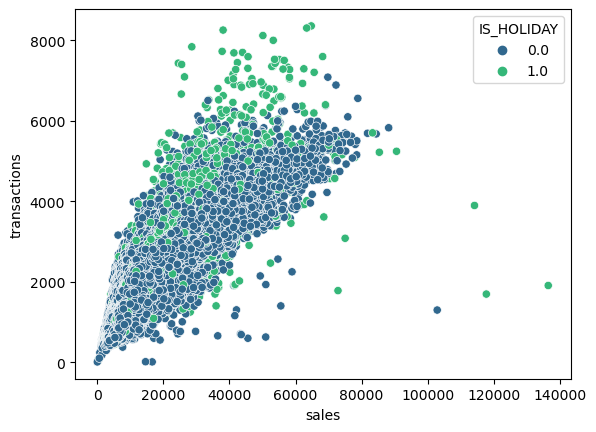

In [35]:
sns.scatterplot(data=train_data, x='sales', y='transactions', hue='IS_HOLIDAY', palette='viridis')

In [36]:
train_data_v2 = train_data.drop(columns = ['sales','transactions']) #dropping transaction data
train_data_v2 = train_data_v2.rename(columns = {'dcoilwtico':'oil_price'})

In [37]:
train = pd.merge(train, train_data_v2, on = ['date', 'store_nbr'], how='left')


In [38]:
# Convert 'date' to datetime format
train['date'] = pd.to_datetime(train['date'])

# Extract month and year
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
# Extract week of the day (Sunday=0, Monday=1, ..., Saturday=6)
train['week_of_day'] = (train['date'].dt.weekday + 1) % 7

# Extract week of the month (1 to 7 = w1, 8 to 15 = w2, 16 to 23 = w3, 24 to end = w4)
train['week_of_month'] = (train['date'].dt.day - 1) // 7 + 1

train['week_number'] = train['date'].dt.isocalendar().week
train['sales'] = pd.to_numeric(train['sales'], errors='coerce')
train.dropna(subset=['sales'], inplace=True)


In [39]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_type,IS_HOLIDAY,oil_price,month,year,week_of_day,week_of_month,week_number
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,1.0,93.14,1,2013,2,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,1.0,93.14,1,2013,2,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,1.0,93.14,1,2013,2,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,1.0,93.14,1,2013,2,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,1.0,93.14,1,2013,2,1,1


In [40]:
train.to_csv(mydir+'preprocessed_train_data.csv')

<Axes: xlabel='month', ylabel='sales'>

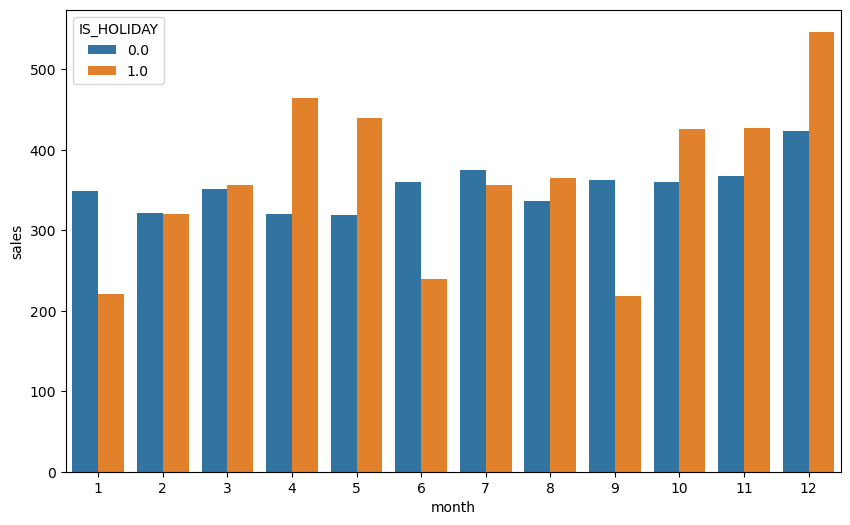

In [39]:
mean_sales_months = train.groupby(['month','IS_HOLIDAY'])['sales'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='sales', hue='IS_HOLIDAY', data=mean_sales_months)

<Axes: xlabel='holiday_type', ylabel='sales'>

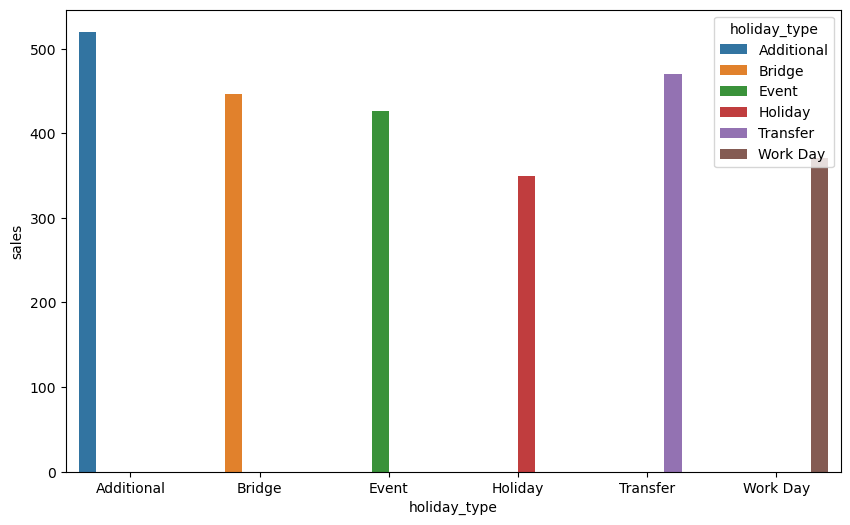

In [44]:
mean_sales_months = train.groupby(['holiday_type'])['sales'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday_type', y='sales', hue='holiday_type', data=mean_sales_months)

<Axes: xlabel='week_of_day', ylabel='sales'>

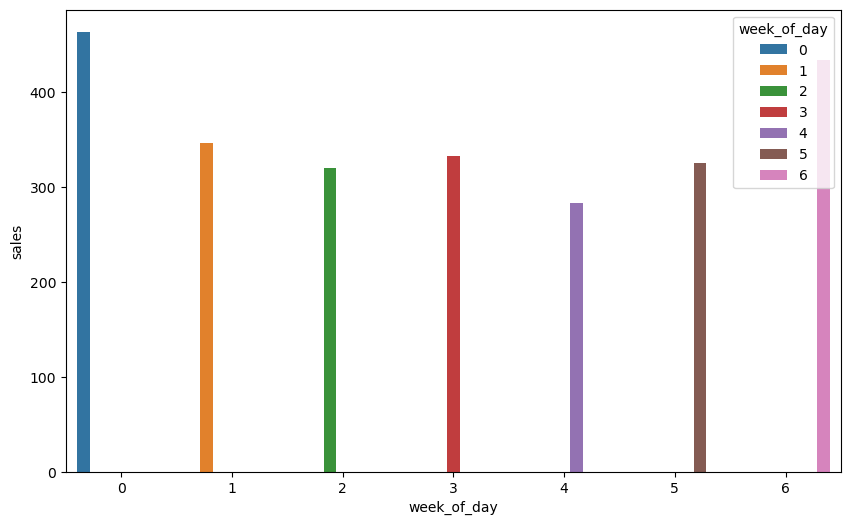

In [45]:
mean_sales_months = train.groupby(['week_of_day'])['sales'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='week_of_day', y='sales', hue='week_of_day', data=mean_sales_months)

<Axes: xlabel='week_of_month', ylabel='sales'>

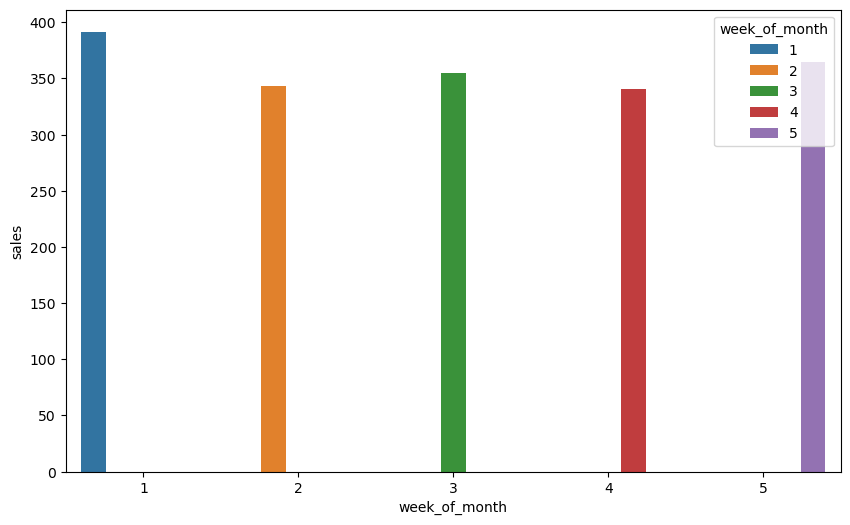

In [46]:
mean_sales_months = train.groupby(['week_of_month'])['sales'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='week_of_month', y='sales', hue='week_of_month', data=mean_sales_months)

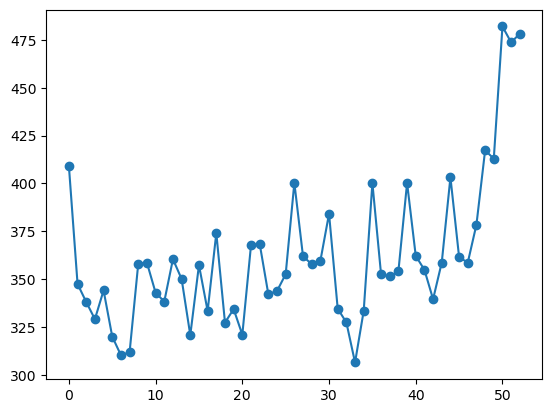

In [62]:
mean_sales_weeks = train.groupby(['week_number'])['sales'].mean().reset_index()
plt.plot(mean_sales_weeks.sales,marker = 'o')


In [31]:
train.groupby(['year','IS_HOLIDAY'])['sales'].mean()

year  IS_HOLIDAY
2013  0.0           213.672327
      1.0           260.914082
2014  0.0           318.305290
      1.0           367.779841
2015  0.0           367.179372
      1.0           431.485762
2016  0.0           435.221628
      1.0           500.763677
2017  0.0           477.346147
      1.0           542.339739
Name: sales, dtype: float64

### Heatmap of Family vs Promotion	
#### this will give an idea if specific product family is sold more when in Promotion

/var/folders/r1/dsylm7cn0vg3015hchpddz9m0000gn/T/ipykernel_61460/1848854580.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = grouped_data.pivot('family', 'onpromotion', 'sales')


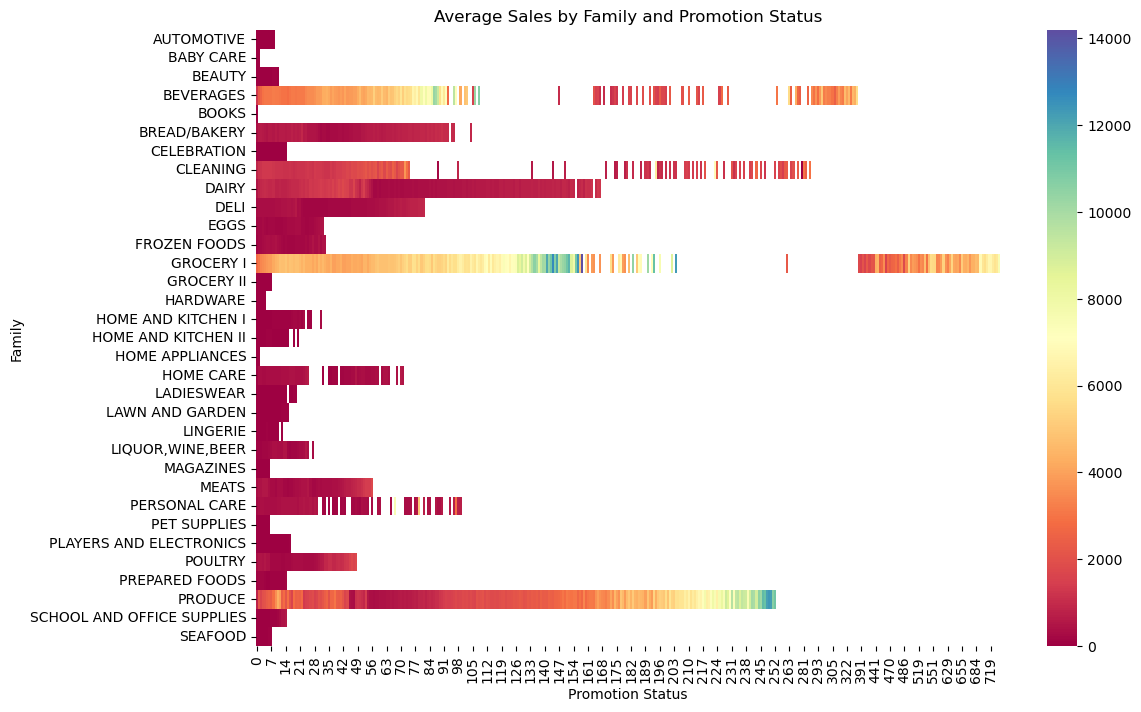

In [32]:
grouped_data = train.groupby(['family', 'onpromotion'])['sales'].mean().reset_index()

# Pivot the data to get a matrix format suitable for a heatmap
heatmap_data = grouped_data.pivot('family', 'onpromotion', 'sales')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="Spectral")
plt.title('Average Sales by Family and Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Family')
plt.show()

#### Findings:

Sales of Family of 'Beverages', 'Grocery - I' and 'Produce' are more in case of more products onpromotion

### Sales vs Type

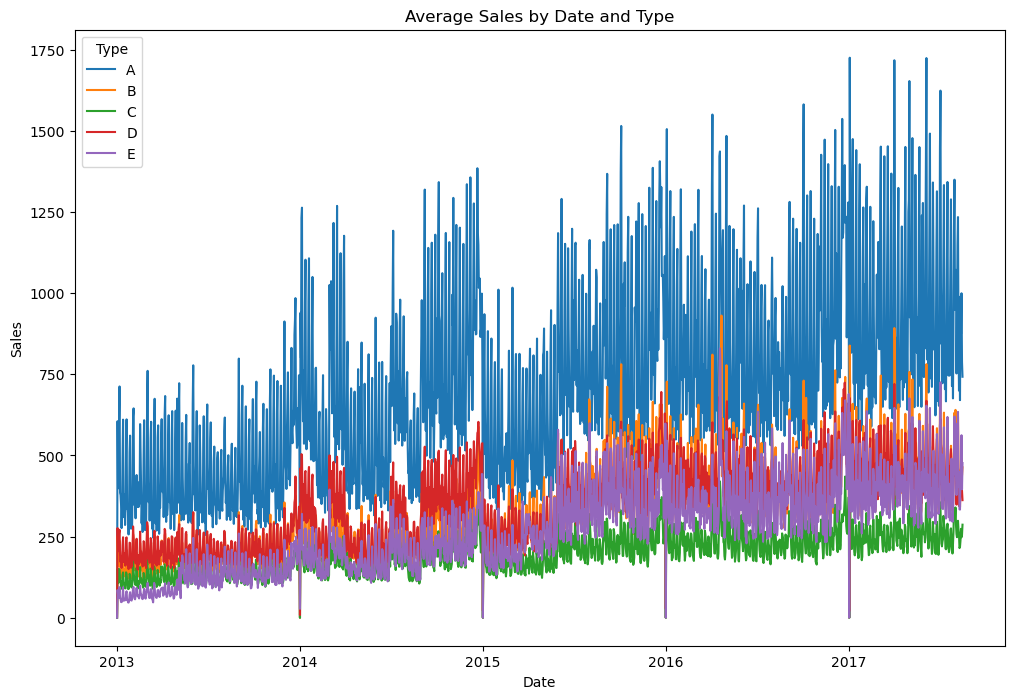

In [33]:
grouped_data = train.groupby(['date', 'type'])['sales'].mean().reset_index()

# Pivot the data to get a matrix format suitable for a line plot
pivot_table = grouped_data.pivot(index='date', columns='type', values='sales')

plt.figure(figsize=(12, 8))

# Plot each 'type' separately with the defined color palette
for column in pivot_table:
    plt.plot(pivot_table.index, pivot_table[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Average Sales by Date and Type')
plt.legend(title='Type')

# Customize the grid
plt.grid(True, color='white')
plt.show()

#### Findings:

The sales have shown a consistent increase each year for all types: A, B, C, D, and E. 

Among these types, Type A stands out with the highest sales